In [1]:
import pandas as pd
# Libraries to work with dataframe
import numpy as np
# Libraries for datetime
import datetime as dt
# Libraries for EDA
import matplotlib as plt
import seaborn as sns
# Libraries for ML
from sklearn import linear_model, datasets
import statsmodels.api as sm

In [2]:
Calgary_df= pd.read_csv(r'C:\Users\layin\OneDrive\Desktop\Fina_Lhl_project1\Final_Lhl_Project\weather project csv file\uptodatecalgary.csv', index_col="DATE")

In [3]:
Calgary_df

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN,WDFG,WSFG
DATE,,,,,,,,,
2008-12-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,NaN,9.0,-5.0,NaN,NaN
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,NaN,24.0,NaN,NaN,NaN
2008-12-25,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,NaN,16.0,2.0,NaN,NaN
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,NaN,27.0,NaN,NaN,NaN
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,NaN,37.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,NaN,53.0,58.0,49.0,NaN,NaN
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,63.0,77.0,50.0,14.0,69.3
2023-07-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,70.0,90.0,51.0,33.0,107.4


In [4]:
Calgary_df.loc["2018-01-01",:]

STATION                        CA003031094
NAME       CALGARY INTERNATIONAL CS, AB CA
PRCP                                   0.0
SNWD                                   4.3
TAVG                                   0.0
TMAX                                  26.0
TMIN                                 -26.0
WDFG                                   0.0
WSFG                                   0.0
Name: 2018-01-01, dtype: object

cleaning

In [5]:
# calculate null percentage

In [6]:
#find the no of null value in this  columns
Calgary_df.apply(pd.isnull).sum()

STATION       0
NAME          0
PRCP         56
SNWD       3140
TAVG       2258
TMAX         29
TMIN         32
WDFG       3048
WSFG       3048
dtype: int64

In [7]:
# to calculate the percentage of null divided by the no of rows
null_pct = Calgary_df.apply(pd.isnull).sum() / Calgary_df.shape[0]
null_pct


STATION    0.000000
NAME       0.000000
PRCP       0.010646
SNWD       0.596958
TAVG       0.429278
TMAX       0.005513
TMIN       0.006084
WDFG       0.579468
WSFG       0.579468
dtype: float64

In [8]:
#select column
Calgary1_df =Calgary_df.iloc[:, [0,1,2,3,5,6]].copy()

In [9]:
Calgary1_df

,STATION,NAME,PRCP,SNWD,TMAX,TMIN
DATE,,,,,,
2008-12-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,9.0,-5.0
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,24.0,NaN
2008-12-25,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,16.0,2.0
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,27.0,NaN
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,37.0,NaN
...,...,...,...,...,...,...
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,NaN,58.0,49.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,77.0,50.0
2023-07-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,90.0,51.0


In [10]:
Calgary1_df.columns = ["STATION","Name","precip","snow_depth","temp_max", "temp_min"]

In [11]:
Calgary1_df

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2008-12-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,9.0,-5.0
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,24.0,NaN
2008-12-25,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,16.0,2.0
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,27.0,NaN
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,37.0,NaN
...,...,...,...,...,...,...
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,NaN,58.0,49.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,77.0,50.0
2023-07-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,90.0,51.0


clean up the data and fill null values

In [12]:
Calgary1_df["snow_depth"]. value_counts()

snow_depth
0.0     333
0.4     303
2.8     185
1.2     164
0.8     147
2.0     139
2.4     131
1.6     130
3.1     124
3.5      86
3.9      84
4.3      64
4.7      50
5.1      37
6.3      35
5.5      35
5.9      20
7.5      14
6.7      13
7.1       8
7.9       5
9.4       3
8.7       3
9.1       2
8.3       1
9.8       1
11.4      1
10.2      1
10.6      1
Name: count, dtype: int64

verify correct data types

In [13]:
Calgary1_df.dtypes

STATION        object
Name           object
precip        float64
snow_depth    float64
temp_max      float64
temp_min      float64
dtype: object

In [14]:
Calgary1_df.index

Index(['2008-12-23', '2008-12-24', '2008-12-25', '2008-12-26', '2008-12-27',
       '2008-12-28', '2008-12-29', '2008-12-30', '2008-12-31', '2009-01-01',
       ...
       '2023-07-23', '2023-07-24', '2023-07-25', '2023-07-26', '2023-07-27',
       '2023-07-28', '2023-07-29', '2023-07-30', '2023-07-31', '2023-08-01'],
      dtype='object', name='DATE', length=5260)

In [15]:
# convert out DATE into a datetime
Calgary1_df.index= pd.to_datetime(Calgary1_df.index)

In [16]:
Calgary1_df.index

DatetimeIndex(['2008-12-23', '2008-12-24', '2008-12-25', '2008-12-26',
               '2008-12-27', '2008-12-28', '2008-12-29', '2008-12-30',
               '2008-12-31', '2009-01-01',
               ...
               '2023-07-23', '2023-07-24', '2023-07-25', '2023-07-26',
               '2023-07-27', '2023-07-28', '2023-07-29', '2023-07-30',
               '2023-07-31', '2023-08-01'],
              dtype='datetime64[ns]', name='DATE', length=5260, freq=None)

In [17]:
# we can check  day month ,year
Calgary1_df.index.year

Index([2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2009,
       ...
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
      dtype='int32', name='DATE', length=5260)

In [18]:
Calgary1_df.index.day_of_year

Index([358, 359, 360, 361, 362, 363, 364, 365, 366,   1,
       ...
       204, 205, 206, 207, 208, 209, 210, 211, 212, 213],
      dtype='int32', name='DATE', length=5260)

In [19]:
Calgary1_df.index.month

Index([12, 12, 12, 12, 12, 12, 12, 12, 12,  1,
       ...
        7,  7,  7,  7,  7,  7,  7,  7,  7,  8],
      dtype='int32', name='DATE', length=5260)

In [20]:
#checking for gaps
Calgary1_df.index.year.value_counts().sort_index()

DATE
2008      9
2009    363
2010    362
2011    362
2012    364
2013    329
2014    362
2015    363
2016    358
2017    360
2018    360
2019    363
2020    364
2021    363
2022    365
2023    213
Name: count, dtype: int64

Replace null value .

In [21]:
# select where row is null for min
Calgary1_df[pd.isnull(Calgary1_df["temp_min"])]

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,24.0,NaN
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,27.0,NaN
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,37.0,NaN
2008-12-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.06,3.9,20.0,NaN
2008-12-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.01,4.3,17.0,NaN
2008-12-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.03,6.7,NaN,NaN
2008-12-31,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,2.8,NaN,NaN
2009-01-01,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.05,NaN,NaN,NaN
2009-01-02,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,NaN,NaN


In [22]:
# select where row is null for max
Calgary1_df[pd.isnull(Calgary1_df["temp_max"])]

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2008-12-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.03,6.7,NaN,NaN
2008-12-31,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,2.8,NaN,NaN
2009-01-01,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.05,NaN,NaN,NaN
2009-01-02,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,NaN,NaN
2009-01-03,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.1,NaN,NaN
2009-01-04,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.1,NaN,NaN
2009-01-05,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.1,NaN,NaN
2009-01-06,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,2.8,NaN,NaN
2009-01-07,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,2.8,NaN,NaN


In [23]:
# select where row is null for snow_depth
Calgary1_df[pd.isnull(Calgary1_df["snow_depth"])]

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,37.0,NaN
2009-01-01,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.05,NaN,NaN,NaN
2009-01-31,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,44.0,15.0
2009-04-07,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,54.0,28.0
2009-04-17,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,60.0,26.0
...,...,...,...,...,...,...
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,NaN,58.0,49.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,77.0,50.0
2023-07-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,90.0,51.0


In [24]:
# select where row is null in precip
Calgary1_df[pd.isnull(Calgary1_df["precip"])]

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2009-01-09,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,2.8,36.0,NaN
2010-04-08,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,60.0,27.0
2010-08-16,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,73.0,47.0
2011-10-03,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,65.0,32.0
2013-01-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,6.3,12.0,8.0
2013-07-13,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,64.0,47.0
2013-07-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,73.0,NaN
2013-08-13,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,76.0,NaN
2013-08-14,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,84.0,53.0


<Axes: xlabel='DATE'>

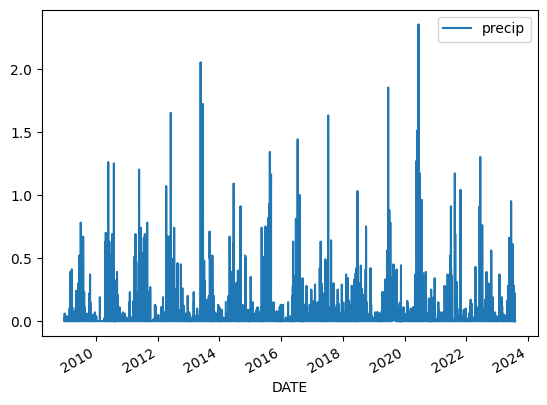

In [25]:
Calgary1_df[["precip"]].plot()

<Axes: xlabel='DATE'>

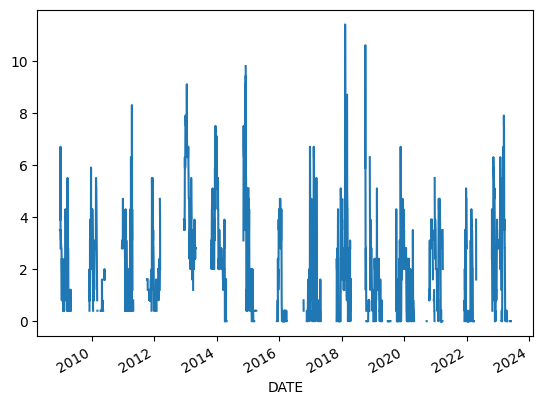

In [26]:
Calgary1_df["snow_depth"].plot()

more than 6inches of snow  are present  with the highest more than 10inches in 2018. 2020 has 6inches 

In [27]:
#tomorrows temp_max	

In [28]:
#fill all  values with the previous ones in temp_max and temp_min and others. this is called forward fill
Calgary1c_df = Calgary1_df.fillna(method="ffill")

In [29]:
Calgary1c_df.head()

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2008-12-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.0,3.5,9.0,-5.0
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.0,3.5,24.0,-5.0
2008-12-25,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.0,3.5,16.0,2.0
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.0,3.5,27.0,2.0
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.0,3.5,37.0,2.0


In [30]:
#tomorrows temp_max	

analysing weather data

<Axes: xlabel='DATE'>

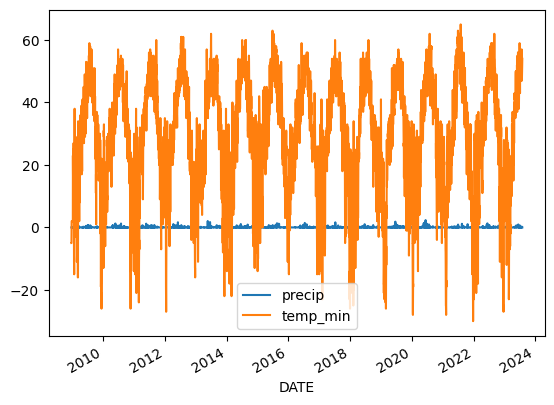

In [31]:
Calgary1c_df[["precip","temp_min"]].plot()

<Axes: xlabel='DATE'>

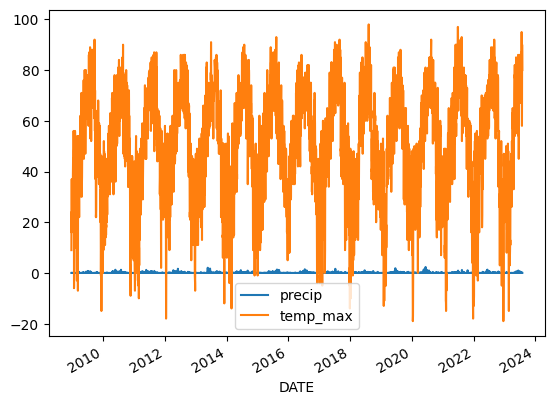

In [32]:
Calgary1c_df[["precip","temp_max"]].plot()

<Axes: xlabel='DATE'>

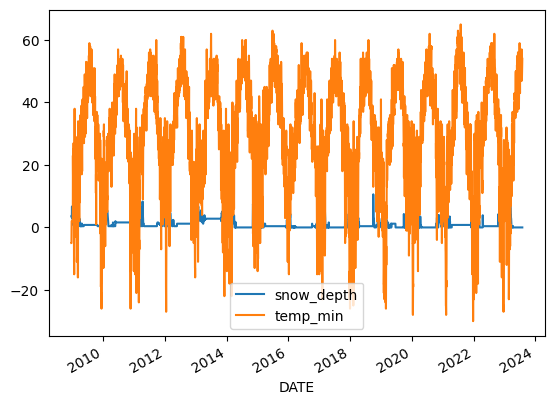

In [33]:
Calgary1c_df[["snow_depth","temp_min"]].plot()

<Axes: xlabel='DATE'>

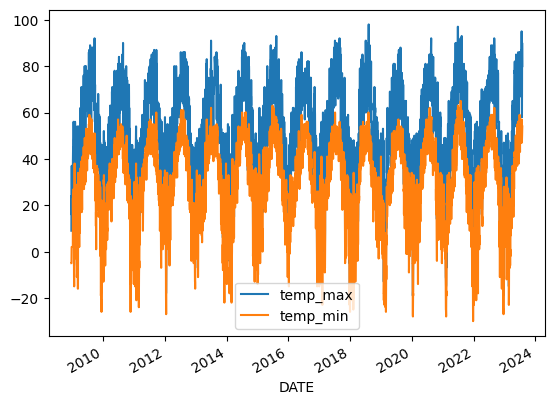

In [34]:
Calgary1c_df[["temp_max","temp_min"]].plot()

<Axes: xlabel='DATE'>

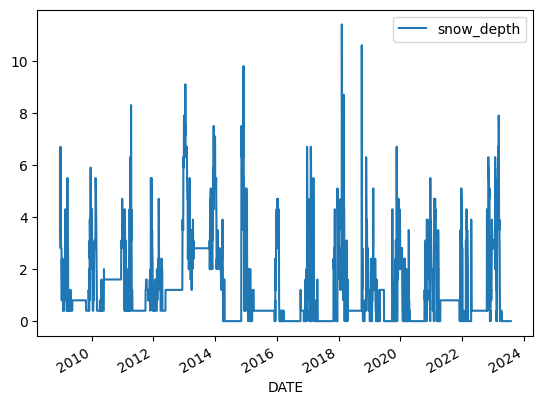

In [35]:
# plot of snow_depth after filling
Calgary1c_df[["snow_depth"]].plot()

<Axes: xlabel='DATE'>

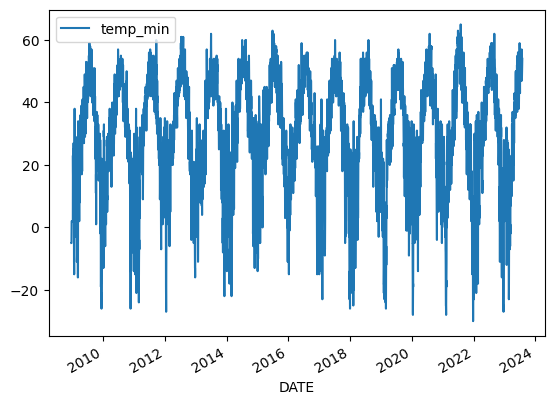

In [36]:
Calgary1c_df[["temp_min"]].plot()

In [37]:
# checking total weather condition per year
Calgary1c_df.groupby(Calgary1c_df.index.year).sum()

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2008,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",0.10,35.2,184.0,4.0
2009,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",9.45,394.1,18212.0,9808.0
2010,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",13.02,571.7,18299.0,10513.0
2011,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",14.95,453.4,17969.0,10437.0
2012,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",14.49,500.5,18623.0,10967.0
2013,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",16.09,1168.8,16326.0,9300.0
2014,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",14.51,493.8,18147.0,10741.0
2015,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",25.90,239.2,19518.0,11657.0
2016,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",16.34,184.0,18921.0,11047.0


In [94]:
#snow-depth per year
Calgary1c_df.groupby(Calgary1c_df.index.year).sum()["temp_max"]

DATE
2008      184.0
2009    18212.0
2010    18299.0
2011    17969.0
2012    18623.0
2013    16326.0
2014    18147.0
2015    19518.0
2016    18921.0
2017    18771.0
2018    18071.0
2019    17630.0
2020    18533.0
2021    19008.0
2022    18952.0
2023    11328.0
Name: temp_max, dtype: float64

<Axes: xlabel='DATE'>

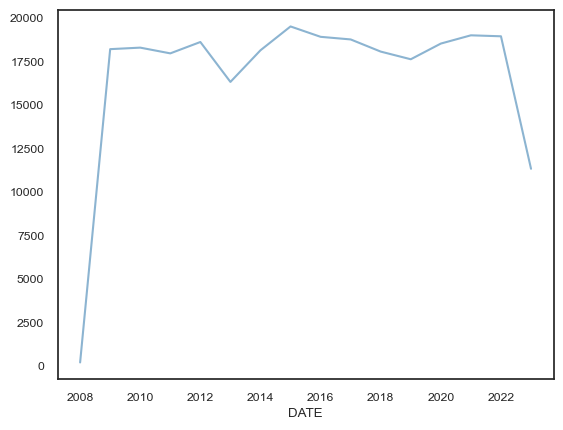

In [93]:
#snow-depth per year
Calgary1c_df.groupby(Calgary1c_df.index.year).sum()["temp_max"].plot()

<Axes: xlabel='DATE'>

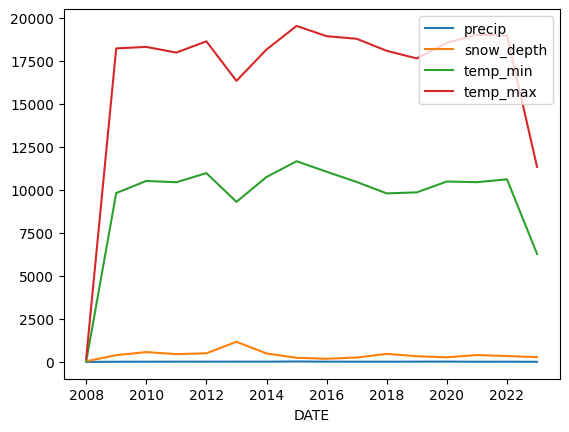

In [85]:
Calgary1c_df.groupby(Calgary1c_df.index.year).sum()[["precip", "snow_depth", "temp_min", "temp_max"]].plot()


In [39]:
#prep per year
Calgary1c_df.groupby(Calgary1c_df.index.year).sum()["precip"]

DATE
2008     0.10
2009     9.45
2010    13.02
2011    14.95
2012    14.49
2013    16.09
2014    14.51
2015    25.90
2016    16.34
2017    13.43
2018    13.24
2019    16.88
2020    18.83
2021    10.89
2022    12.98
2023     6.48
Name: precip, dtype: float64

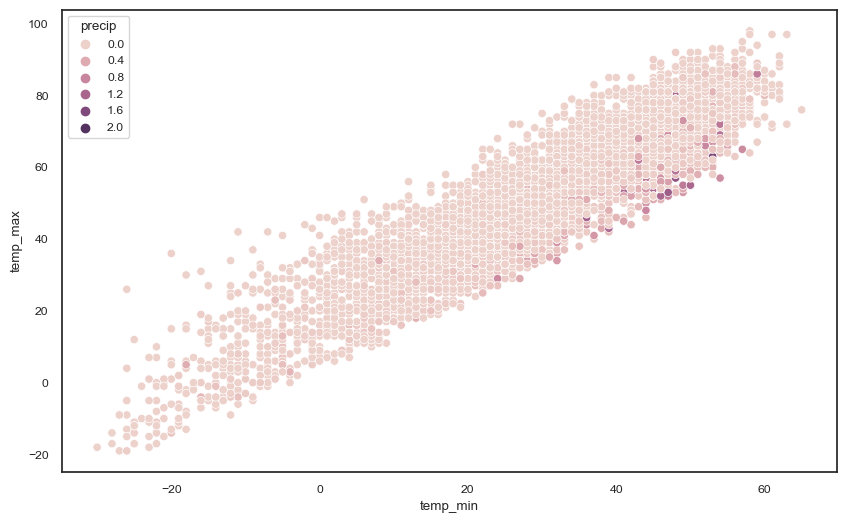

In [91]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=Calgary1c_df, x='temp_min', y='temp_max', hue='precip')

plt.show()



training machine tearning data set

target variable= temp_min while others are the predictors

In [40]:
Calgary1c_df["target"] = Calgary1c_df. shift(-1)["temp_max"]

In [41]:
Calgary1c_df

,STATION,Name,precip,snow_depth,temp_max,temp_min,target
DATE,,,,,,,
2008-12-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,9.0,-5.0,24.0
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,24.0,-5.0,16.0
2008-12-25,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,16.0,2.0,27.0
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,27.0,2.0,37.0
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,37.0,2.0,20.0
...,...,...,...,...,...,...,...
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,0.0,58.0,49.0,77.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,77.0,50.0,90.0
2023-07-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,90.0,51.0,83.0


 the above predicted tomorrows temp-max from today eg the target (47 ferheight) of 2013-01-02 is tomorrows temp_max (47). it helps predict tomorrows maximum temp.

Notice the last target for 2023-07-31 has NAN this is because the last data i downloaded was on that day,we will can fill the data with the previous value. ((   'r' in Calgary1cf_df mean fill))

In [42]:
Calgary1cf_df= Calgary1c_df.ffill()

In [43]:
Calgary1cf_df

,STATION,Name,precip,snow_depth,temp_max,temp_min,target
DATE,,,,,,,
2008-12-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,9.0,-5.0,24.0
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,24.0,-5.0,16.0
2008-12-25,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,16.0,2.0,27.0
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,27.0,2.0,37.0
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,37.0,2.0,20.0
...,...,...,...,...,...,...,...
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,0.0,58.0,49.0,77.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,77.0,50.0,90.0
2023-07-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,90.0,51.0,83.0


In [44]:
Calgary1cfs_df= Calgary1cf_df[['precip','snow_depth','temp_max','temp_min','target']]

In [45]:
Calgary1cfs_df

,precip,snow_depth,temp_max,temp_min,target
DATE,,,,,
2008-12-23,0.00,3.5,9.0,-5.0,24.0
2008-12-24,0.00,3.5,24.0,-5.0,16.0
2008-12-25,0.00,3.5,16.0,2.0,27.0
2008-12-26,0.00,3.5,27.0,2.0,37.0
2008-12-27,0.00,3.5,37.0,2.0,20.0
...,...,...,...,...,...
2023-07-28,0.22,0.0,58.0,49.0,77.0
2023-07-29,0.00,0.0,77.0,50.0,90.0
2023-07-30,0.00,0.0,90.0,51.0,83.0


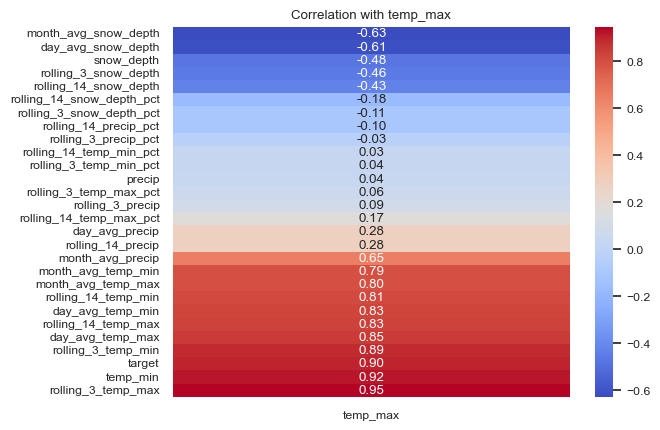

In [90]:
corr = Calgary1cfs_df.corr()
target_corr = corr['temp_max'].drop('temp_max')

target_corr_sorted = target_corr.sort_values(ascending=True)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with temp_max')
plt.show()

In [46]:
#Compute the correlation matrix
corr= Calgary1cfs_df.corr()
corr

,precip,snow_depth,temp_max,temp_min,target
precip,1.000000,-0.047409,0.040950,0.155116,0.055195
snow_depth,-0.047409,1.000000,-0.480220,-0.499044,-0.443235
temp_max,0.040950,-0.480220,1.000000,0.918778,0.900102
temp_min,0.155116,-0.499044,0.918778,1.000000,0.859006
target,0.055195,-0.443235,0.900102,0.859006,1.000000


explain correllation.

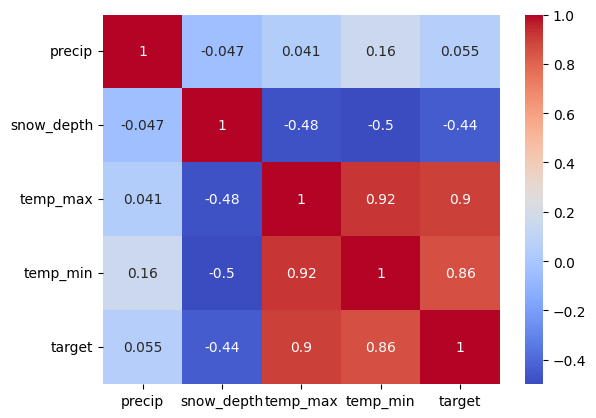

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix


# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Application of machine learning.
ridge regression model penalizez coefficients to account for multi-collinearity.

use regression model because it reduces overfitting

In [48]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [49]:
# Create a Ridge Regression model
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha (regularization strength) default value


In [50]:
# select columns in this list except the target.~ mean negation.
predictors = Calgary1cfs_df.columns[~Calgary1cfs_df.columns.isin(["target"])] 
predictors

Index(['precip', 'snow_depth', 'temp_max', 'temp_min'], dtype='object')

since it is a time series data, we will use time series cross validation or back testing to account for the time series nature of the data.. we have to be careful not to use today's  value to predict yesterday.

In [51]:
# the function  take in the data, model, predictors, start parameter  of 365 days before we start predictions and this is for a period of 30 days we create a set of predictions and move on to the next 30 days.. this can be adjusted.
def backtest(Calgary1cfs_df,ridge_model,predictors,start=365,step=30):
    all_predictions=[]

    for i in range(start, Calgary1cfs_df.shape[0], step):
        train = Calgary1cfs_df.iloc[:i,:]
        test = Calgary1cfs_df.iloc[i:i+step,:]

        ridge_model.fit(train[predictors], train["target"])

        preds =ridge_model.predict(test[predictors])

        preds  = pd.Series(preds, index=test.index)

        combined= pd.concat([test["target"],preds], axis=1)
        combined.columns= ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        all_predictions.append(combined)
        return pd.concat(all_predictions)

In [52]:
predictions = backtest(Calgary1cfs_df, ridge_model, predictors)

In [53]:
predictions

,actual,prediction,diff
DATE,,,
2009-12-25,36.0,25.453110,10.546890
2009-12-26,33.0,35.579502,2.579502
2009-12-27,26.0,34.319902,8.319902
2009-12-28,27.0,28.705703,1.705703
2009-12-29,10.0,27.637800,17.637800
2009-12-30,0.0,14.795348,14.795348
2009-12-31,17.0,5.003396,11.996604
2010-01-01,25.0,17.960132,7.039868
2010-01-02,22.0,27.131876,5.131876


The diff show the  how accurate our prediction is we will immport mean_absolute_error

In [54]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


In [55]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

7.36183149766193

In [56]:
predictions["diff"].mean()

7.36183149766193

on average, we are 8.8 degrees off in our prediction.

In [57]:
r2_ridge = r2_score(predictions["actual"], predictions["prediction"])
r2_ridge

0.589064255226294

In [58]:
#combined.plot()

In [59]:
rmse_ridge = mean_squared_error(predictions["actual"], predictions["prediction"], squared=False)
rmse_ridge

9.208357690838383

In [60]:
ridge_model.coef_

array([-6.02383039,  0.13511503,  0.72822984,  0.23127236])

These coefficients indicate the direction and magnitude of the relationship between each predictor and the target variable 
For the 'precip' predictor,Coefficient is -2.54469502 and this is associated with a decrease of approximately -2.54 units in the target variable (assuming all other predictors are held constant).
For the 'snow_depth' predictor, the Coefficient is 0.17808088 and it shows positive relationship increase of approximately 0.18 units in the target variable (assuming all other predictors are held constant).
For the 'temp_max' predictor, the Coefficient is 0.5520832 and shows a unit increase in 'temp_max' is associated with an increase of approximately 0.55 units in the target variable 
For the 'temp_min' predictor, the Coefficient is 0.39646166 indicates a unit increase in 'temp_min' is associated with an increase of approximately 0.40 units in the target variable (assuming all other predictors are held constant).

===========================================================================================================================
===========================================================================================================================

how to improve our accuracy. calculate the average temperature and precipitation in the past few days, 3,14 days and looking how the current day compare to those days.

d

In [61]:
def pct_diff(old, new):
    return (new - old) / old  # return new minus old divided by old.

def compute_rolling(Calgary1cfs_df, horizon, col):
    label = f"rolling_{horizon}_{col}"  # to create a label.... used to create a dynamic string
    Calgary1cfs_df[label] = Calgary1cfs_df[col].rolling(horizon).mean()  # note that rolling mean takes the values from previous dates to calculate over the horizon
    Calgary1cfs_df[f"{label}_pct"] = pct_diff(Calgary1cfs_df[label], Calgary1cfs_df[col])  # to find percentage difference between the current day and the rolling

rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["precip", "snow_depth", "temp_max", "temp_min"]:
        compute_rolling(Calgary1cfs_df, horizon, col)
        
Calgary1cfs_df


C:\Users\layin\AppData\Local\Temp\ipykernel_3452\2205066882.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Calgary1cfs_df[label] = Calgary1cfs_df[col].rolling(horizon).mean()  # note that rolling mean takes the values from previous dates to calculate over the horizon


,precip,snow_depth,temp_max,temp_min,target,rolling_3_precip,rolling_3_precip_pct,rolling_3_snow_depth,rolling_3_snow_depth_pct,rolling_3_temp_max,...,rolling_3_temp_min,rolling_3_temp_min_pct,rolling_14_precip,rolling_14_precip_pct,rolling_14_snow_depth,rolling_14_snow_depth_pct,rolling_14_temp_max,rolling_14_temp_max_pct,rolling_14_temp_min,rolling_14_temp_min_pct
DATE,,,,,,,,,,,,,,,,,,,,,
2008-12-23,0.00,3.5,9.0,-5.0,24.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-24,0.00,3.5,24.0,-5.0,16.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-25,0.00,3.5,16.0,2.0,27.0,0.000000,NaN,3.5,0.0,16.333333,...,-2.666667,-1.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-26,0.00,3.5,27.0,2.0,37.0,0.000000,NaN,3.5,0.0,22.333333,...,-0.333333,-7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-27,0.00,3.5,37.0,2.0,20.0,0.000000,NaN,3.5,0.0,26.666667,...,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,0.22,0.0,58.0,49.0,77.0,0.106667,1.0625,0.0,NaN,66.000000,...,48.000000,0.020833,0.048571,3.529412,0.0,NaN,77.857143,-0.255046,51.928571,-0.056396
2023-07-29,0.00,0.0,77.0,50.0,90.0,0.106667,-1.0000,0.0,NaN,66.666667,...,48.666667,0.027397,0.045714,-1.000000,0.0,NaN,77.785714,-0.010101,51.642857,-0.031812
2023-07-30,0.00,0.0,90.0,51.0,83.0,0.073333,-1.0000,0.0,NaN,75.000000,...,50.000000,0.020000,0.045714,-1.000000,0.0,NaN,78.428571,0.147541,51.428571,-0.008333


cut off the first 14 days with missing valuea because there is no prediction for them.

In [62]:
Calgary1cfs_df = Calgary1cfs_df.iloc[14:,:]

In [63]:
Calgary1cfs_df

,precip,snow_depth,temp_max,temp_min,target,rolling_3_precip,rolling_3_precip_pct,rolling_3_snow_depth,rolling_3_snow_depth_pct,rolling_3_temp_max,...,rolling_3_temp_min,rolling_3_temp_min_pct,rolling_14_precip,rolling_14_precip_pct,rolling_14_snow_depth,rolling_14_snow_depth_pct,rolling_14_temp_max,rolling_14_temp_max_pct,rolling_14_temp_min,rolling_14_temp_min_pct
DATE,,,,,,,,,,,,,,,,,,,,,
2009-01-06,0.00,2.8,17.0,2.0,17.0,0.000000,NaN,3.0,-0.066667,17.000000,...,2.000000,0.000000,0.010714,-1.000000,3.578571,-0.217565,19.785714,-0.140794,1.500000,0.333333
2009-01-07,0.00,2.8,17.0,2.0,17.0,0.000000,NaN,2.9,-0.034483,17.000000,...,2.000000,0.000000,0.010714,-1.000000,3.528571,-0.206478,19.285714,-0.118519,2.000000,0.000000
2009-01-08,0.02,2.8,17.0,2.0,36.0,0.006667,2.0000,2.8,0.000000,17.000000,...,2.000000,0.000000,0.012143,0.647059,3.478571,-0.195072,19.357143,-0.121771,2.000000,0.000000
2009-01-09,0.02,2.8,36.0,2.0,39.0,0.013333,0.5000,2.8,0.000000,23.333333,...,2.000000,0.000000,0.013571,0.473684,3.428571,-0.183333,20.000000,0.800000,2.000000,0.000000
2009-01-10,0.00,2.8,39.0,23.0,41.0,0.013333,-1.0000,2.8,0.000000,30.666667,...,9.000000,1.555556,0.013571,-1.000000,3.378571,-0.171247,20.142857,0.936170,3.500000,5.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,0.22,0.0,58.0,49.0,77.0,0.106667,1.0625,0.0,NaN,66.000000,...,48.000000,0.020833,0.048571,3.529412,0.000000,NaN,77.857143,-0.255046,51.928571,-0.056396
2023-07-29,0.00,0.0,77.0,50.0,90.0,0.106667,-1.0000,0.0,NaN,66.666667,...,48.666667,0.027397,0.045714,-1.000000,0.000000,NaN,77.785714,-0.010101,51.642857,-0.031812
2023-07-30,0.00,0.0,90.0,51.0,83.0,0.073333,-1.0000,0.0,NaN,75.000000,...,50.000000,0.020000,0.045714,-1.000000,0.000000,NaN,78.428571,0.147541,51.428571,-0.008333


some NAN is still in the percentage columns(pct)  and we have to solve them by filling them with 0 in the next cell

In [64]:
Calgary1cfs_df =Calgary1cfs_df.fillna(0)

Add more predictions

In [65]:
def expand_mean(x):
    return x.expanding(1).mean()

for col in ["precip", "snow_depth", "temp_max", "temp_min"]:
    Calgary1cfs_df[f"month_avg_{col}"] = Calgary1cfs_df.groupby(Calgary1cfs_df.index.month)[col].apply(expand_mean).reset_index(level=0, drop=True)#(drop original index so it aligns with original df when assigning values back)
    Calgary1cfs_df[f"day_avg_{col}"] = Calgary1cfs_df.groupby(Calgary1cfs_df.index.day_of_year)[col].apply(expand_mean).reset_index(level=0, drop=True)


In [66]:
Calgary1cfs_df

,precip,snow_depth,temp_max,temp_min,target,rolling_3_precip,rolling_3_precip_pct,rolling_3_snow_depth,rolling_3_snow_depth_pct,rolling_3_temp_max,...,rolling_14_temp_min,rolling_14_temp_min_pct,month_avg_precip,day_avg_precip,month_avg_snow_depth,day_avg_snow_depth,month_avg_temp_max,day_avg_temp_max,month_avg_temp_min,day_avg_temp_min
DATE,,,,,,,,,,,,,,,,,,,,,
2009-01-06,0.00,2.8,17.0,2.0,17.0,0.000000,0.0000,3.0,-0.066667,17.000000,...,1.500000,0.333333,0.000000,0.000000,2.800000,2.800000,17.000000,17.000000,2.000000,2.000000
2009-01-07,0.00,2.8,17.0,2.0,17.0,0.000000,0.0000,2.9,-0.034483,17.000000,...,2.000000,0.000000,0.000000,0.000000,2.800000,2.800000,17.000000,17.000000,2.000000,2.000000
2009-01-08,0.02,2.8,17.0,2.0,36.0,0.006667,2.0000,2.8,0.000000,17.000000,...,2.000000,0.000000,0.006667,0.020000,2.800000,2.800000,17.000000,17.000000,2.000000,2.000000
2009-01-09,0.02,2.8,36.0,2.0,39.0,0.013333,0.5000,2.8,0.000000,23.333333,...,2.000000,0.000000,0.010000,0.020000,2.800000,2.800000,21.750000,36.000000,2.000000,2.000000
2009-01-10,0.00,2.8,39.0,23.0,41.0,0.013333,-1.0000,2.8,0.000000,30.666667,...,3.500000,5.571429,0.008000,0.000000,2.800000,2.800000,25.200000,39.000000,6.200000,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,0.22,0.0,58.0,49.0,77.0,0.106667,1.0625,0.0,0.000000,66.000000,...,51.928571,-0.056396,0.074073,0.019286,0.513501,0.628571,74.791762,75.642857,51.160183,50.714286
2023-07-29,0.00,0.0,77.0,50.0,90.0,0.106667,-1.0000,0.0,0.000000,66.666667,...,51.642857,-0.031812,0.073904,0.022143,0.512329,0.628571,74.796804,77.714286,51.157534,51.642857
2023-07-30,0.00,0.0,90.0,51.0,83.0,0.073333,-1.0000,0.0,0.000000,75.000000,...,51.428571,-0.008333,0.073736,0.022857,0.511162,0.628571,74.831435,81.000000,51.157175,50.928571


Rerun our predictors, we have included some predictors lets see in our index.

In [67]:
#we can check our predictors now. .~ mean negation.
predictors = Calgary1cfs_df.columns[~Calgary1cfs_df.columns.isin(["target"])] 
predictors

Index(['precip', 'snow_depth', 'temp_max', 'temp_min', 'rolling_3_precip',
       'rolling_3_precip_pct', 'rolling_3_snow_depth',
       'rolling_3_snow_depth_pct', 'rolling_3_temp_max',
       'rolling_3_temp_max_pct', 'rolling_3_temp_min',
       'rolling_3_temp_min_pct', 'rolling_14_precip', 'rolling_14_precip_pct',
       'rolling_14_snow_depth', 'rolling_14_snow_depth_pct',
       'rolling_14_temp_max', 'rolling_14_temp_max_pct', 'rolling_14_temp_min',
       'rolling_14_temp_min_pct', 'month_avg_precip', 'day_avg_precip',
       'month_avg_snow_depth', 'day_avg_snow_depth', 'month_avg_temp_max',
       'day_avg_temp_max', 'month_avg_temp_min', 'day_avg_temp_min'],
      dtype='object')

predictors

In [68]:
 #Check for infinity values in each column
inf_columns =Calgary1cfs_df.columns[Calgary1cfs_df.applymap(np.isinf).any()]


inf_columns

Index(['rolling_3_temp_max_pct', 'rolling_3_temp_min_pct',
       'rolling_14_temp_min_pct'],
      dtype='object')

it needs cleaning because of this infinity in the columns, so it has to be dealth with by fill for our backtesting function to work. this ts done in the next cell.

In [69]:


Calgary1cfs_df = Calgary1cfs_df.replace([np.inf, -np.inf], np.nan)# code replace all infinite values with NAN using replace and then fill  with previous non nan value along the columns.
Calgary1cfs_df = Calgary1cfs_df.ffill()


In [70]:
Calgary1cfs_df.apply(pd.isnull).sum()

precip                       0
snow_depth                   0
temp_max                     0
temp_min                     0
target                       0
rolling_3_precip             0
rolling_3_precip_pct         0
rolling_3_snow_depth         0
rolling_3_snow_depth_pct     0
rolling_3_temp_max           0
rolling_3_temp_max_pct       0
rolling_3_temp_min           0
rolling_3_temp_min_pct       0
rolling_14_precip            0
rolling_14_precip_pct        0
rolling_14_snow_depth        0
rolling_14_snow_depth_pct    0
rolling_14_temp_max          0
rolling_14_temp_max_pct      0
rolling_14_temp_min          0
rolling_14_temp_min_pct      0
month_avg_precip             0
day_avg_precip               0
month_avg_snow_depth         0
day_avg_snow_depth           0
month_avg_temp_max           0
day_avg_temp_max             0
month_avg_temp_min           0
day_avg_temp_min             0
dtype: int64

In [71]:
# backtest function to call our predictions
predictions = backtest(Calgary1cfs_df, ridge_model, predictors)

In [72]:
Calgary1cfs_df

,precip,snow_depth,temp_max,temp_min,target,rolling_3_precip,rolling_3_precip_pct,rolling_3_snow_depth,rolling_3_snow_depth_pct,rolling_3_temp_max,...,rolling_14_temp_min,rolling_14_temp_min_pct,month_avg_precip,day_avg_precip,month_avg_snow_depth,day_avg_snow_depth,month_avg_temp_max,day_avg_temp_max,month_avg_temp_min,day_avg_temp_min
DATE,,,,,,,,,,,,,,,,,,,,,
2009-01-06,0.00,2.8,17.0,2.0,17.0,0.000000,0.0000,3.0,-0.066667,17.000000,...,1.500000,0.333333,0.000000,0.000000,2.800000,2.800000,17.000000,17.000000,2.000000,2.000000
2009-01-07,0.00,2.8,17.0,2.0,17.0,0.000000,0.0000,2.9,-0.034483,17.000000,...,2.000000,0.000000,0.000000,0.000000,2.800000,2.800000,17.000000,17.000000,2.000000,2.000000
2009-01-08,0.02,2.8,17.0,2.0,36.0,0.006667,2.0000,2.8,0.000000,17.000000,...,2.000000,0.000000,0.006667,0.020000,2.800000,2.800000,17.000000,17.000000,2.000000,2.000000
2009-01-09,0.02,2.8,36.0,2.0,39.0,0.013333,0.5000,2.8,0.000000,23.333333,...,2.000000,0.000000,0.010000,0.020000,2.800000,2.800000,21.750000,36.000000,2.000000,2.000000
2009-01-10,0.00,2.8,39.0,23.0,41.0,0.013333,-1.0000,2.8,0.000000,30.666667,...,3.500000,5.571429,0.008000,0.000000,2.800000,2.800000,25.200000,39.000000,6.200000,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,0.22,0.0,58.0,49.0,77.0,0.106667,1.0625,0.0,0.000000,66.000000,...,51.928571,-0.056396,0.074073,0.019286,0.513501,0.628571,74.791762,75.642857,51.160183,50.714286
2023-07-29,0.00,0.0,77.0,50.0,90.0,0.106667,-1.0000,0.0,0.000000,66.666667,...,51.642857,-0.031812,0.073904,0.022143,0.512329,0.628571,74.796804,77.714286,51.157534,51.642857
2023-07-30,0.00,0.0,90.0,51.0,83.0,0.073333,-1.0000,0.0,0.000000,75.000000,...,51.428571,-0.008333,0.073736,0.022857,0.511162,0.628571,74.831435,81.000000,51.157175,50.928571


In [73]:
mean_absolute_error(predictions["actual"], predictions["prediction"])


16.96139941561253

In [74]:
r2_ridge = r2_score(predictions["actual"], predictions["prediction"])
r2_ridge

-1.270867854706137

In [75]:
rmse_ridge = mean_squared_error(predictions["actual"], predictions["prediction"], squared=False)
rmse_ridge

19.160470675607776

In [76]:
predictions["diff"].mean()

16.96139941561253

In [77]:
ridge_model.coef_

array([  0.01527591,  -0.99693828,   1.04978679,  -2.14374489,
        -1.76596252,   0.19136289,   6.57744128,  12.87551767,
        -0.22592539,   0.62222313,  -0.07798171,   0.33075621,
         5.42102145,  -0.36939359,  -5.96951208,  -6.74734701,
         0.26823911,  -0.60118943,  -0.3325374 ,  -0.04871147,
       -12.22373957,   0.01527591,   3.39570218,  -1.37099897,
        -0.2828717 ,  -0.28013927,   0.79932371,   2.31619493])

In [78]:
predictions.sort_values("diff", ascending= False) # to sshow days with errors

,actual,prediction,diff
DATE,,,
2010-02-05,15.0,50.708163,35.708163
2010-01-30,14.0,49.592188,35.592188
2010-01-13,48.0,15.205995,32.794005
2010-01-12,45.0,15.951611,29.048389
2010-01-09,50.0,24.104809,25.895191
2010-01-14,47.0,21.414784,25.585216
2010-02-06,19.0,43.482524,24.482524
2010-01-28,30.0,52.647353,22.647353
2010-01-29,20.0,42.130530,22.130530


In [79]:
Calgary1cfs_df.loc["2014-02-24":"2014-03-02"]

,precip,snow_depth,temp_max,temp_min,target,rolling_3_precip,rolling_3_precip_pct,rolling_3_snow_depth,rolling_3_snow_depth_pct,rolling_3_temp_max,...,rolling_14_temp_min,rolling_14_temp_min_pct,month_avg_precip,day_avg_precip,month_avg_snow_depth,day_avg_snow_depth,month_avg_temp_max,day_avg_temp_max,month_avg_temp_min,day_avg_temp_min
DATE,,,,,,,,,,,,,,,,,,,,,
2014-02-24,0.01,2.4,15.0,-18.0,21.0,0.016667,-0.4,2.533333,-0.052632,8.333333,...,8.428571,-3.135593,0.007091,0.018333,2.333939,2.500000,30.309091,22.500000,10.696970,4.000000
2014-02-25,0.00,2.4,21.0,-7.0,34.0,0.010000,-1.0,2.533333,-0.052632,12.000000,...,8.428571,-1.830508,0.007048,0.008333,2.334337,2.300000,30.253012,24.333333,10.590361,3.666667
2014-02-26,0.00,2.4,34.0,11.0,29.0,0.003333,-1.0,2.400000,0.000000,23.333333,...,9.642857,0.140741,0.007006,0.003333,2.334731,2.616667,30.275449,22.333333,10.592814,6.333333
2014-02-27,0.00,2.4,29.0,6.0,7.0,0.000000,0.0,2.400000,0.000000,28.000000,...,9.357143,-0.358779,0.006964,0.000000,2.335119,2.750000,30.267857,32.166667,10.565476,5.500000
2014-02-28,0.00,2.0,7.0,-17.0,-14.0,0.000000,0.0,2.266667,-0.117647,23.333333,...,6.928571,-3.453608,0.006923,0.005000,2.333136,2.550000,30.130178,25.166667,10.402367,1.833333
2014-03-01,0.01,2.0,-14.0,-22.0,-8.0,0.003333,2.0,2.133333,-0.062500,7.333333,...,4.000000,-6.500000,0.015806,0.001667,1.799355,2.450000,37.838710,24.166667,18.277419,4.666667
2014-03-02,0.00,2.0,-8.0,-22.0,-2.0,0.003333,-1.0,2.000000,0.000000,-5.000000,...,1.000000,-23.000000,0.015705,0.000000,1.800641,2.366667,37.544872,24.500000,18.019231,6.666667


In [80]:
predictions["diff"].round().value_counts().sort_index()

diff
0.0     1
6.0     1
7.0     2
8.0     1
9.0     2
10.0    1
11.0    1
12.0    2
14.0    4
16.0    1
17.0    2
18.0    1
20.0    1
21.0    1
22.0    1
23.0    1
24.0    1
26.0    2
29.0    1
33.0    1
36.0    2
Name: count, dtype: int64

<Axes: xlabel='diff'>

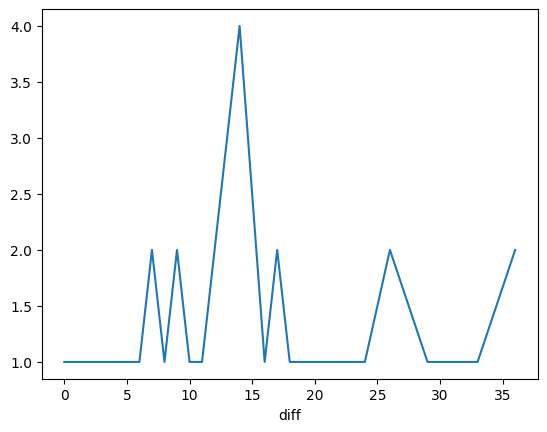

In [81]:
predictions["diff"].round().value_counts().sort_index().plot()

conclusion to improve the model, we always create more columns , add to the predictors and run it.

little variations occured as we can see.

In [82]:
ridge_model.coef_

array([  0.01527591,  -0.99693828,   1.04978679,  -2.14374489,
        -1.76596252,   0.19136289,   6.57744128,  12.87551767,
        -0.22592539,   0.62222313,  -0.07798171,   0.33075621,
         5.42102145,  -0.36939359,  -5.96951208,  -6.74734701,
         0.26823911,  -0.60118943,  -0.3325374 ,  -0.04871147,
       -12.22373957,   0.01527591,   3.39570218,  -1.37099897,
        -0.2828717 ,  -0.28013927,   0.79932371,   2.31619493])

These coefficients represent the estimated impact of each predictor on the target variable (temp_min)
Precipitation (precip): 9.52623501 This indicate a positive coefficient indicates that an increase in precipitation is associated with an increase in the temp_min.
Analysis: This suggests that higher levels of precipitation are correlated with higher minimum temperatures. This might be due to the fact that rainy or wet conditions can lead to a warming effect, preventing temperatures from dropping as low.
Snow Depth (snow_depth): -0.80945195 :a negative coefficient indicates that an increase in snow depth is associated with a decrease in the temp_min.
Analysis: This suggests an inverse relationship between snow depth and minimum temperature. As snow accumulates, it tends to have a cooling effect on the surrounding environment, resulting in lower minimum temperatures.
Maximum Temperature (temp_max): 0.75077928 a positive coefficient indicates that an increase in maximum temperature is associated with an increase in the temp_min.
Analysis: This suggests that higher maximum temperatures are correlated with higher minimum temperatures. Warmer days might lead to milder nights, resulting in higher minimum temperatures.

Creating functions  to make predictions(ie contain the prediction)

creating more predictors